In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,confusion_matrix,precision_score,roc_curve
import seaborn as sns
from sklearn.utils import shuffle
# from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

**Read and shuffle the dataset**

In [2]:
df = pd.read_csv('dataset.csv')
df = shuffle(df,random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Removing Hyphen from strings**

In [3]:
for col in df.columns:

    df[col] = df[col].str.replace('_',' ')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Remove the trailing space from the symptom columns**

In [4]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Fill the NaN values with zero**

In [5]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


In [6]:
df1 = pd.read_csv('Symptom-severity.csv')
x=df1['Symptom']
x

,Symptom
0,itching
1,skin_rash
2,nodal_skin_eruptions
3,continuous_sneezing
4,shivering
...,...
128,inflammatory_nails
129,blister
130,red_sore_around_nose
131,yellow_crust_ooze


In [7]:
dfx=pd.DataFrame()
dfx["Disease"]=df["Disease"]
y=0
dfx[x]=0
for index, row in df.iterrows():
    for symptom in df.columns[1:]:
        if row[symptom] != 0:
            dfx.loc[index, row[symptom]] = 1
dfx = dfx.fillna(0)
dfx[dfx.columns[1:]]=dfx[dfx.columns[1:]].astype('int')

<ipython-input-7-523efbcc9ce8>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfx[x]=0
<ipython-input-7-523efbcc9ce8>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfx[x]=0
<ipython-input-7-523efbcc9ce8>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfx[x]=0
<ipython-input-7-523efbcc9ce8>:4: 

In [8]:
dfx.columns = dfx.columns.str.strip()

In [9]:
dfx

,Disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,yellow crust ooze,ulcers on tongue,spotting urination,pain behind the eyes,red spots over body,internal itching,movement stiffness,knee pain,hip joint pain,dischromic patches
0,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,Psoriasis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Peptic ulcer diseae,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4917,Dengue,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4918,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:

dfx.drop(dfx.columns[-4:], axis=1, inplace=True)
dfx

,Disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,weakness of one body side,altered sensorium,nodal skin eruptions,red sore around nose,yellow crust ooze,ulcers on tongue,spotting urination,pain behind the eyes,red spots over body,internal itching
0,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,Psoriasis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Peptic ulcer diseae,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4917,Dengue,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4918,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
columns_to_drop = ['foul_smell_ofurine', 'dischromic_patches', 'spotting_urination']
dfx = dfx.drop(columns=columns_to_drop)


In [ ]:

dfx[dfx.columns[1:]].sum(axis=0).sort_values()

,0
swelling_joints,0
muscle_weakness,0
hip_joint_pain,0
knee_pain,0
slurred_speech,0
...,...
nausea,1146
loss of appetite,1152
high fever,1362
vomiting,1914


In [10]:
symptom_sums = dfx.iloc[:, 1:].sum(axis=0)
symptoms_with_no_values = symptom_sums[symptom_sums == 0].index.tolist()

columns_to_drop = symptoms_with_no_values
dfx = dfx.drop(columns=columns_to_drop)
dfx[dfx.columns[1:]].sum(axis=0).sort_values()
print(dfx.columns.to_list())


['Disease', 'itching', 'shivering', 'chills', 'acidity', 'vomiting', 'fatigue', 'anxiety', 'restlessness', 'lethargy', 'cough', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'nausea', 'constipation', 'diarrhoea', 'malaise', 'phlegm', 'congestion', 'dizziness', 'cramps', 'bruising', 'obesity', 'unsteadiness', 'depression', 'irritability', 'polyuria', 'coma', 'palpitations', 'blackheads', 'scurring', 'blister', 'skin rash', 'pus filled pimples', 'mood swings', 'weight loss', 'fast heart rate', 'excessive hunger', 'muscle weakness', 'abnormal menstruation', 'muscle wasting', 'patches in throat', 'high fever', 'extra marital contacts', 'yellowish skin', 'loss of appetite', 'abdominal pain', 'yellowing of eyes', 'chest pain', 'loss of balance', 'lack of concentration', 'blurred and distorted vision', 'drying and tingling lips', 'slurred speech', 'stiff neck', 'swelling joints', 'painful walking', 'dark urine', 'yellow urine', 'receiving blood transfusion', 'receivi

In [11]:
y=df['Disease'].unique()
y

array(['Acne', 'Hyperthyroidism', 'AIDS', 'Chronic cholestasis',
       'Hypertension', 'Hypoglycemia', 'Arthritis', 'Hepatitis B',
       'Migraine', 'Urinary tract infection', 'Diabetes', 'Hepatitis D',
       'Psoriasis', 'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)',
       'Hepatitis E', 'Cervical spondylosis', 'Bronchial Asthma',
       'hepatitis A', 'Allergy', 'Hepatitis C', 'Pneumonia',
       'Hypothyroidism', 'Gastroenteritis', 'Varicose veins', 'Jaundice',
       'Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Heart attack', 'Tuberculosis', 'Typhoid', 'Common Cold',
       'Peptic ulcer diseae', 'Paralysis (brain hemorrhage)',
       'Fungal infection', 'Impetigo', 'GERD', 'Dengue', 'Malaria',
       'Chicken pox', 'Osteoarthristis'], dtype=object)

In [12]:
data = dfx.iloc[:,1:].values
labels = dfx['Disease'].values

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.7,random_state=42)
x_train, x_val, y_train,y_val=train_test_split(data,labels,test_size=0.3,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, x_val.shape,y_val.shape)

(3444, 131) (1476, 131) (3444,) (1476,) (1476, 131) (1476,)


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val=le.transform(y_val)


In [15]:
y=le.classes_
y

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [16]:
len(y)

41

XGBoost cross-validation mean F1 score: 0.999
[0]	validation_0-mlogloss:0.36975	validation_1-mlogloss:0.43628
[1]	validation_0-mlogloss:0.28436	validation_1-mlogloss:0.34767
[2]	validation_0-mlogloss:0.21773	validation_1-mlogloss:0.27668
[3]	validation_0-mlogloss:0.16889	validation_1-mlogloss:0.22136
[4]	validation_0-mlogloss:0.13033	validation_1-mlogloss:0.17535
[5]	validation_0-mlogloss:0.10094	validation_1-mlogloss:0.13917
[6]	validation_0-mlogloss:0.07803	validation_1-mlogloss:0.10933
[7]	validation_0-mlogloss:0.06117	validation_1-mlogloss:0.08687
[8]	validation_0-mlogloss:0.04843	validation_1-mlogloss:0.06929
[9]	validation_0-mlogloss:0.03877	validation_1-mlogloss:0.05601
[10]	validation_0-mlogloss:0.03125	validation_1-mlogloss:0.04542
[11]	validation_0-mlogloss:0.02554	validation_1-mlogloss:0.03729
[12]	validation_0-mlogloss:0.02119	validation_1-mlogloss:0.03090
[13]	validation_0-mlogloss:0.01775	validation_1-mlogloss:0.02589
[14]	validation_0-mlogloss:0.01505	validation_1-mloglo

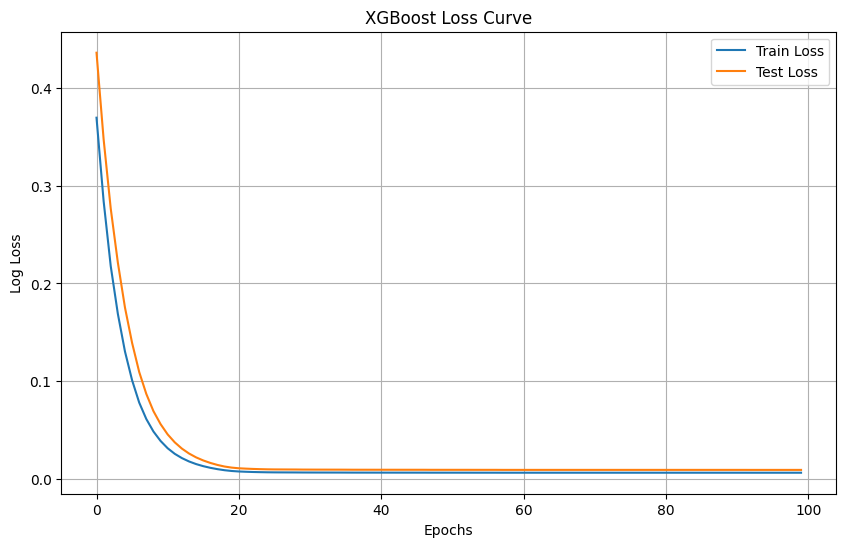

XGBoost test F1 Score: 1.0000, AUC-ROC Score: 1.0000
XGBoost validation F1 Score: 1.0000, AUC-ROC Score: 1.0000


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import f1_score, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pickle

# Assuming you've already loaded your dataset into DataFrames x_train, x_test, x_val, y_train, y_test, y_val
n_classes = len(y)
classifiers = {
    'XGBoost': XGBClassifier(eval_metric='mlogloss', objective='multi:softprob', num_class=n_classes),
}

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

# K-fold Cross Validation model evaluation
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, x_train, y_train, cv=kfold, scoring='f1_weighted')
    print(f'{name} cross-validation mean F1 score: %.3f' % cv_scores.mean())

    # Define evaluation set
    eval_set = [(x_train, y_train), (x_test, y_test)]

    # Train and log training and validation loss
    clf.fit(
        x_train, y_train,
        eval_set=eval_set,
        verbose=True
    )

    # Extract log data for training and validation loss
    results = clf.evals_result()
    print(results)
    train_loss = results['validation_0']['mlogloss']
    test_loss = results['validation_1']['mlogloss']

    # Plot training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, label='Train Loss')
    plt.plot(test_loss, label='Test Loss')
    plt.title(f'{name} Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.legend()
    plt.grid()
    plt.show()

    # Evaluate on test and validation sets
    test_predictions = clf.predict(x_test)
    test_f1 = f1_score(y_test, test_predictions, average='weighted')
    test_roc = roc_auc_score(y_test, clf.predict_proba(x_test), multi_class='ovr')
    print(f'{name} test F1 Score: {test_f1:.4f}, AUC-ROC Score: {test_roc:.4f}')

    val_predictions = clf.predict(x_val)
    val_f1 = f1_score(y_val, val_predictions, average='weighted')
    val_roc = roc_auc_score(y_val, clf.predict_proba(x_val), multi_class='ovr')
    print(f'{name} validation F1 Score: {val_f1:.4f}, AUC-ROC Score: {val_roc:.4f}')

    # Save the model
    pickle.dump(clf, open(f"{name}.pkl", "wb"))

In [ ]:
def predd(m, X):
    # Get probabilities for each class
    proba = m.predict_proba(X)

    # Get the indices and probabilities of the top 5 classes
    top5_idx = np.argsort(proba[0])[-5:][::-1]
    top5_proba = np.sort(proba[0])[-5:][::-1]

    # Get the names of the top 5 diseases
    top5_diseases = y[top5_idx]

    for i in range(5):

        disease = top5_diseases[i]
        probability = top5_proba[i]

        print("Disease Name: ", disease)
        print("Probability: ", probability)

        print("\n")


In [ ]:
x=dfx.columns[1:]


In [ ]:
import pickle

In [ ]:
t=pd.Series([0]*222, index=x)
m=XGBClassifier()
with open("XGBoost.pkl", 'rb') as f:
    m =  pickle.load(f)
t.loc["chest_pain"]=1
t.loc["phlegm"]=1
t.loc["runny_nose"]=1
t.loc["high_fever"]=1
t.loc["throat_irritation"]=1
t.loc["congestion"]=1
t.loc["redness_of_eyes"]=1
t=t.to_numpy()
print(t.shape)
t=t.reshape(1,-1)
predd(m,t)


(222,)
Disease Name:  Common Cold
Probability:  0.9977549


Disease Name:  Psoriasis
Probability:  7.204221e-05


Disease Name:  Hepatitis E
Probability:  7.113583e-05


Disease Name:  Tuberculosis
Probability:  7.0558424e-05


Disease Name:  Dimorphic hemmorhoids(piles)
Probability:  6.8312605e-05




In [20]:
from sklearn.preprocessing import LabelEncoder

def preprocess_and_predict(user_input, model, label_encoder, symptom_columns):
  with open(model, 'rb') as f:
      model = pickle.load(f)

  user_df = pd.DataFrame([user_input], columns=symptom_columns)
  user_df.fillna(0, inplace=True)
  input_data = user_df.values
  prediction = model.predict(input_data)
  probabilities = model.predict_proba(input_data)
  predicted_label = le.inverse_transform(prediction)
  prob_dict = {le.inverse_transform([i])[0]: prob for i, prob in enumerate(probabilities[0])}
  return predicted_label[0], prob_dict

symptom_columns = ['itching', 'shivering', 'chills', 'acidity', 'vomiting', 'fatigue', 'anxiety', 'restlessness', 'lethargy', 'cough', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'nausea', 'constipation', 'diarrhoea', 'malaise', 'phlegm', 'congestion', 'dizziness', 'cramps', 'bruising', 'obesity', 'unsteadiness', 'depression', 'irritability', 'polyuria', 'coma', 'palpitations', 'blackheads', 'scurring', 'blister', 'skin rash', 'pus filled pimples', 'mood swings', 'weight loss', 'fast heart rate', 'excessive hunger', 'muscle weakness', 'abnormal menstruation', 'muscle wasting', 'patches in throat', 'high fever', 'extra marital contacts', 'yellowish skin', 'loss of appetite', 'abdominal pain', 'yellowing of eyes', 'chest pain', 'loss of balance', 'lack of concentration', 'blurred and distorted vision', 'drying and tingling lips', 'slurred speech', 'stiff neck', 'swelling joints', 'painful walking', 'dark urine', 'yellow urine', 'receiving blood transfusion', 'receiving unsterile injections', 'visual disturbances', 'burning micturition', 'bladder discomfort', 'foul smell of urine', 'continuous feel of urine', 'irregular sugar level', 'increased appetite', 'joint pain', 'skin peeling', 'small dents in nails', 'inflammatory nails', 'swelling of stomach', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload', 'pain during bowel movements', 'pain in anal region', 'bloody stool', 'irritation in anus', 'acute liver failure', 'stomach bleeding', 'back pain', 'weakness in limbs', 'neck pain', 'mucoid sputum', 'mild fever', 'muscle pain', 'family history', 'continuous sneezing', 'watering from eyes', 'rusty sputum', 'weight gain', 'puffy face and eyes', 'enlarged thyroid', 'brittle nails', 'swollen extremeties', 'swollen legs', 'prominent veins on calf', 'stomach pain', 'spinning movements', 'sunken eyes', 'silver like dusting', 'swelled lymph nodes', 'blood in sputum', 'swollen blood vessels', 'toxic look (typhos)', 'belly pain', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'loss of smell', 'passage of gases', 'cold hands and feets', 'weakness of one body side', 'altered sensorium', 'nodal skin eruptions', 'red sore around nose', 'yellow crust ooze', 'ulcers on tongue', 'spotting  urination', 'pain behind the eyes', 'red spots over body', 'internal itching', 'movement stiffness', 'knee pain', 'hip joint pain', 'dischromic  patches']

user_input = {
    'chest_pain': 1,
    'phlegm': 1,
    'runny_nose': 1,
    'high_fever': 1,
    'throat_irritation': 1,
    'congestion': 1,
    'redness_of_eyes': 1,
}

# Predict the disease
predicted_disease, probability = preprocess_and_predict(user_input, 'XGBoost.pkl', le, symptom_columns)
print(f"Predicted Disease: {predicted_disease}")
print(f"Probability : {probability}")

Predicted Disease: Common Cold
Probability : {'(vertigo) Paroymsal  Positional Vertigo': 6.7135545e-05, 'AIDS': 7.2657254e-05, 'Acne': 6.6733526e-05, 'Alcoholic hepatitis': 6.885818e-05, 'Allergy': 6.0980707e-05, 'Arthritis': 5.1070376e-05, 'Bronchial Asthma': 5.263362e-05, 'Cervical spondylosis': 4.736915e-05, 'Chicken pox': 5.5851666e-05, 'Chronic cholestasis': 2.8801538e-05, 'Common Cold': 0.9976826, 'Dengue': 6.385241e-05, 'Diabetes': 5.6255692e-05, 'Dimorphic hemmorhoids(piles)': 6.86667e-05, 'Drug Reaction': 4.5000907e-05, 'Fungal infection': 6.574887e-05, 'GERD': 4.817475e-05, 'Gastroenteritis': 6.6415116e-05, 'Heart attack': 2.7449643e-05, 'Hepatitis B': 6.391778e-05, 'Hepatitis C': 5.6427525e-05, 'Hepatitis D': 2.6540685e-05, 'Hepatitis E': 7.618461e-05, 'Hypertension': 4.6537683e-05, 'Hyperthyroidism': 5.6001645e-05, 'Hypoglycemia': 5.5026e-05, 'Hypothyroidism': 5.9112423e-05, 'Impetigo': 7.189678e-05, 'Jaundice': 5.0562114e-05, 'Malaria': 3.6700654e-05, 'Migraine': 5.3141164